<a href="https://colab.research.google.com/github/Josephmdlv/Final-work/blob/main/Human_Rights_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#!pip install linearmodels
import pandas as pd
import seaborn as sns
import numpy as np
import plotly
import plotly.express as px
import warnings
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
import matplotlib.pyplot as plt
import os
from google.colab import files
import requests

def download_and_process_data(url):
  filename = os.path.basename(url)
  response = requests.get(url)

  with open(filename, 'wb') as file:
      file.write(response.content)

  df = pd.read_csv(filename)

  return df

warnings.filterwarnings('ignore')
sns.set(font_scale=1.5)
sns.set_style("white")
plt.rcParams['figure.figsize'] = (12, 8)

In [4]:
df = download_and_process_data("https://raw.githubusercontent.com/Josephmdlv/Final-work/refs/heads/main/Human_Rights_Index_2000_2020.csv")
df

,Year,Bahrain,Egypt,libya,Syria,Tunisia,Yemen,Algeria,Iran,Iraq,Israel,Jordan,Kuwait,Lebanon,Morocco,Saudi Arabia,United Arab emirates
0,2000,0.44,0.32,0.11,0.19,0.32,0.41,0.59,0.39,0.11,0.85,0.62,0.55,0.57,0.60,0.17,0.38
1,2001,0.48,0.32,0.11,0.19,0.32,0.41,0.59,0.39,0.11,0.84,0.62,0.55,0.58,0.60,0.16,0.38
2,2002,0.55,0.32,0.11,0.18,0.32,0.41,0.58,0.39,0.49,0.84,0.61,0.56,0.57,0.60,0.16,0.38
3,2003,0.55,0.32,0.11,0.18,0.32,0.41,0.58,0.39,0.49,0.84,0.62,0.56,0.57,0.60,0.16,0.38
4,2004,0.49,0.32,0.12,0.17,0.32,0.40,0.58,0.36,0.53,0.84,0.62,0.56,0.58,0.60,0.16,0.37
5,2005,0.49,0.32,0.12,0.18,0.32,0.40,0.60,0.27,0.51,0.84,0.62,0.56,0.65,0.60,0.16,0.38
6,2006,0.48,0.32,0.12,0.18,0.32,0.40,0.60,0.25,0.49,0.84,0.63,0.56,0.70,0.60,0.17,0.38
7,2007,0.46,0.32,0.12,0.18,0.32,0.40,0.60,2.40,0.49,0.84,0.63,0.56,0.70,0.61,0.16,0.39
8,2008,0.46,0.32,0.12,0.18,0.32,0.40,0.60,2.40,0.49,0.84,0.63,0.56,0.70,0.60,0.16,0.39
9,2009,0.46,0.32,0.12,0.18,0.32,0.40,0.60,0.22,0.50,0.84,0.63,0.56,0.73,0.60,0.17,0.40


In [6]:
df = df.set_index('Year')
df

,Bahrain,Egypt,libya,Syria,Tunisia,Yemen,Algeria,Iran,Iraq,Israel,Jordan,Kuwait,Lebanon,Morocco,Saudi Arabia,United Arab emirates
Year,,,,,,,,,,,,,,,,
2000,0.44,0.32,0.11,0.19,0.32,0.41,0.59,0.39,0.11,0.85,0.62,0.55,0.57,0.60,0.17,0.38
2001,0.48,0.32,0.11,0.19,0.32,0.41,0.59,0.39,0.11,0.84,0.62,0.55,0.58,0.60,0.16,0.38
2002,0.55,0.32,0.11,0.18,0.32,0.41,0.58,0.39,0.49,0.84,0.61,0.56,0.57,0.60,0.16,0.38
2003,0.55,0.32,0.11,0.18,0.32,0.41,0.58,0.39,0.49,0.84,0.62,0.56,0.57,0.60,0.16,0.38
2004,0.49,0.32,0.12,0.17,0.32,0.40,0.58,0.36,0.53,0.84,0.62,0.56,0.58,0.60,0.16,0.37
2005,0.49,0.32,0.12,0.18,0.32,0.40,0.60,0.27,0.51,0.84,0.62,0.56,0.65,0.60,0.16,0.38
2006,0.48,0.32,0.12,0.18,0.32,0.40,0.60,0.25,0.49,0.84,0.63,0.56,0.70,0.60,0.17,0.38
2007,0.46,0.32,0.12,0.18,0.32,0.40,0.60,2.40,0.49,0.84,0.63,0.56,0.70,0.61,0.16,0.39
2008,0.46,0.32,0.12,0.18,0.32,0.40,0.60,2.40,0.49,0.84,0.63,0.56,0.70,0.60,0.16,0.39


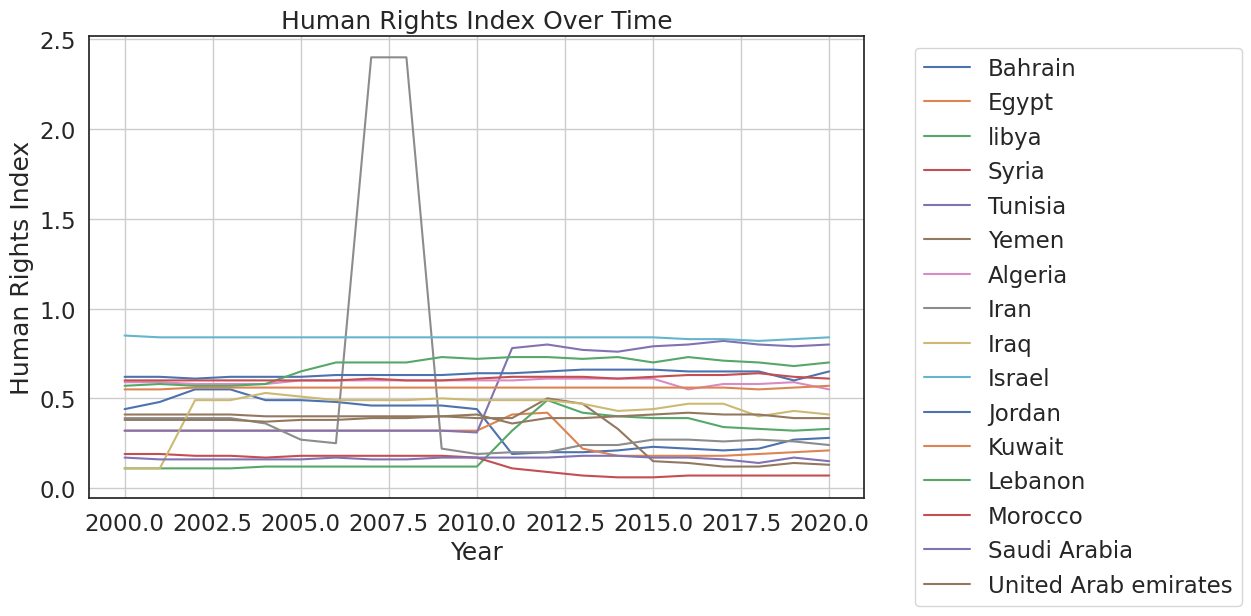

In [11]:
import matplotlib.pyplot as plt

df.plot(figsize=(10, 6))

plt.title('Human Rights Index Over Time')
plt.xlabel('Year')
plt.ylabel('Human Rights Index')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()


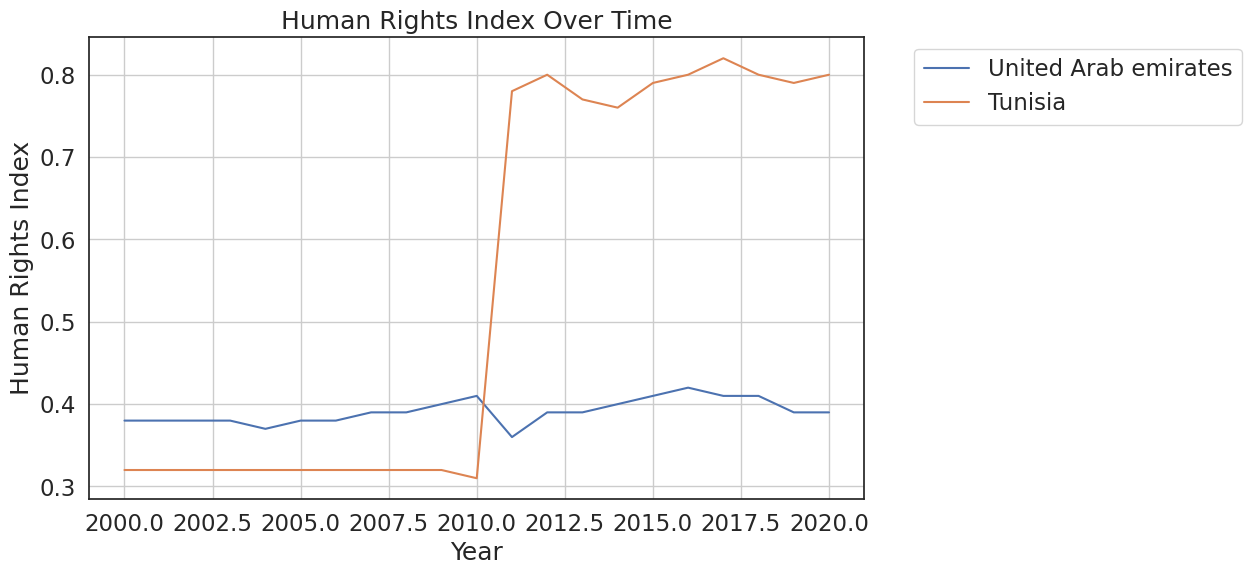

In [15]:
df.plot(y=['United Arab emirates', 'Tunisia'], figsize=(10, 6))
plt.title('Human Rights Index Over Time')
plt.xlabel('Year')
plt.ylabel('Human Rights Index')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()